In [2]:
import importlib

%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import sys
import pwd
import numpy as np
from pathlib import Path
from tqdm import tqdm, trange
from tqdm.contrib.concurrent import process_map
from meth import tools as mtools
import matplotlib.pyplot as plt
import GEOparse
import scanpy as sc
from scipy import sparse as sp
import pyreadr

# %autoreload 2

# Wayne

In [34]:

cwd = Path.cwd()
project_dir = Path('data/Wayne/')
project_id = 'Wayne'
project_samples_dir = 'detection_p_values_sesame'
path_samples = Path.joinpath(project_dir, project_samples_dir)
gl_path_samples = Path.joinpath(cwd, path_samples)
gl_project_dir = Path.joinpath(cwd, project_dir)
metainfo_path = 'mammalianarray_default_predictions_copy.csv'

data_path = 'mammalianarray_default_predictions_copy.csv'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)

In [35]:
# rdata_sesame = pyreadr.read_r(Path.joinpath(project_dir, 'detection_p_values_sesame/all_probes_sesame_normalized.RDS'))
df_sesame = pd.read_csv(Path.joinpath(project_dir, 'betas.csv'),index_col=0)
# df_sesame.set_index('CGid', inplace=True)
print(df_sesame.shape)
df_sesame.head()

(330948, 144)


,ET0215_AM10L,ET0215_EM3L,ET0215_VF6L,ET0215_RM6L,ET0215_VF2L,ET0215_EF4L,ET0215_ControlF7L,ET0215_AF7L,ET0215_AM7L,ET0215_SM7L,...,ET0215_CF13B,ET0215_AM5B,ET0215_AF9B,ET0215_SF10B,ET0215_RM1B,ET0215_AF3B,ET0215_VM8B,ET0215_CM8B,ET0215_RM5B,ET0215_ControlM6B
cg00000165_TC21,0.488497,0.480638,0.480988,0.485970,0.453424,0.489981,0.470748,0.463907,0.520466,0.492263,...,0.508456,0.457821,0.489105,0.512363,0.454725,0.492842,0.451083,0.470395,0.524883,0.444731
cg00001209_TC21,0.843054,0.839191,0.846582,0.854151,0.878952,0.837668,0.877271,0.876795,0.771787,0.890039,...,0.921959,0.899398,0.895369,0.890514,0.887780,0.902595,0.758381,0.860072,0.896445,0.836463
cg00001364_TC21,0.894383,0.914747,0.913515,0.924633,0.932361,0.902978,0.922835,0.914902,0.837230,0.939791,...,0.894584,0.870177,0.848844,0.792075,0.875768,0.896836,0.801838,0.877272,0.848116,0.873201
cg00001582_TC21,0.046435,0.043950,0.042922,0.043529,0.035833,0.034553,0.037163,0.036471,0.055088,0.054627,...,0.040198,0.039016,0.047113,0.049125,0.043920,0.041857,0.050875,0.054214,0.049643,0.032139
cg00002920_TC21,0.682785,0.703191,0.694720,0.731987,0.747875,0.668616,0.777228,0.706941,0.636992,0.790614,...,0.143896,0.184177,0.167003,0.201880,0.181908,0.220735,0.223249,0.210300,0.213973,0.205717


In [36]:
df_p_sesame = pd.read_csv(Path.joinpath(project_dir, 'pvals.csv'),index_col=0)
# df_p_sesame.set_index('CGid', inplace=True)
print(df_p_sesame.shape)
x = df_p_sesame.values
# print(np.sum(np.sum(1.*(x < 0.01), axis=1) >= 16))# x.shape[1]))
df_p_sesame.head()

(330948, 144)


,ET0215_AM10L,ET0215_EM3L,ET0215_VF6L,ET0215_RM6L,ET0215_VF2L,ET0215_EF4L,ET0215_ControlF7L,ET0215_AF7L,ET0215_AM7L,ET0215_SM7L,...,ET0215_CF13B,ET0215_AM5B,ET0215_AF9B,ET0215_SF10B,ET0215_RM1B,ET0215_AF3B,ET0215_VM8B,ET0215_CM8B,ET0215_RM5B,ET0215_ControlM6B
cg00000165_TC21,0.891631,0.734009,0.933971,0.904303,0.795108,0.876646,0.946862,0.903118,0.987531,0.953777,...,0.773402,0.791444,0.973858,0.769434,0.641535,0.926698,0.790507,0.888243,0.759482,0.618919
cg00001209_TC21,0.009618,0.012510,0.019497,0.015152,0.011236,0.011383,0.010756,0.011999,0.041604,0.006788,...,0.005274,0.010975,0.007665,0.014087,0.010766,0.008553,0.025042,0.015466,0.012291,0.022160
cg00001364_TC21,0.001692,0.002339,0.002318,0.002193,0.002141,0.001671,0.001984,0.001848,0.002632,0.001629,...,0.001608,0.002141,0.001431,0.002444,0.001796,0.002057,0.001911,0.001577,0.001577,0.001556
cg00001582_TC21,0.002369,0.002975,0.002231,0.002589,0.003003,0.002617,0.003223,0.002920,0.002314,0.002782,...,0.002700,0.002452,0.002314,0.002507,0.002479,0.002865,0.002066,0.001873,0.002038,0.002314
cg00002920_TC21,0.033365,0.042147,0.080420,0.047306,0.053102,0.047107,0.031589,0.049948,0.175710,0.023005,...,0.071732,0.165253,0.125558,0.166162,0.132555,0.181973,0.170431,0.199879,0.205746,0.178255


In [37]:
df_meta = pd.read_csv(gl_metainfo_path, index_col=0)
# df_meta.set_index('Basename', inplace=True)
# print(df_meta.Tissue.value_counts())
print(df_meta.shape)
df_meta.head()

(144, 91)


,PredictedSpeciesLatinName,ExternalSampleID,Well_Address,Plate_Number,Sample_Group,Pool_ID,Sentrix_ID,Sentrix_Position,Sex,Species,...,LifespanUberClock_Heart,LifespanUberClock_Kidney,LifespanUberClock_Muscle,LifespanUberClock_Cortex,LifespanUberClock_Striatum,LifespanUberClock_Cerebellum,LifespanUberClock_Brain,LifespanUberClock_Fibroblast,LifespanUberClock_Tail,LifespanUberClock_panTissue
SID,,,,,,,,,,,,,,,,,,,,,
ET0215_AF10B,Danio rerio,AF10B,C10,32002151,ET0215_AF10B,NaN,2.069660e+11,R03C01,female,Musmusculus,...,23.884253,-6.473401,1.240207,3.801444,0.742179,-3.689742,4.301981,21.046977,5.807267,-7.848188
ET0215_AF11B,Rattus norvegicus,AF11B,B10,32002151,ET0215_AF11B,NaN,2.069660e+11,R02C01,female,Musmusculus,...,23.577918,-6.077609,2.016486,4.237305,1.433653,-3.129090,4.888675,21.019877,5.713282,-7.372311
ET0215_AF12L,Mus musculus,AF12L,D05,32002151,ET0215_AF12L,NaN,2.069660e+11,R06C02,female,Musmusculus,...,1.350837,2.473628,-0.061754,0.087752,0.792230,0.904557,0.235447,-1.173817,0.387865,0.056342
ET0215_AF1L,Mus musculus,AF1L,H04,32002151,ET0215_AF1L,NaN,2.069660e+11,R02C02,female,Musmusculus,...,1.623943,2.530734,0.214300,-0.026863,0.720163,1.010883,0.183221,-0.669693,0.415750,-0.279443
ET0215_AF3B,Mus musculus,AF3B,D06,32002152,ET0215_AF3B,NaN,2.069660e+11,R02C02,female,Musmusculus,...,2.239526,1.727559,0.858695,0.550976,1.563069,2.324138,0.213193,0.408538,0.208866,-0.284926


In [38]:
# np.intersect1d(df_meta.SID.values, df_p_sesame.columns).shape

In [39]:

def try_replica(x):
    try:
        return int(x.split('_')[-1])
    except:
        return 1

df_meta_2 = df_meta.copy()
df_meta.reset_index(inplace=True)
df_meta_2.reset_index(inplace=True)
df_meta['Name PerCov'] = df_meta['SID'].str.cat(['percentage'] * df_meta.shape[0], sep='_')
df_meta['Data Type'] = 'percentage'
df_meta_2['Name PerCov'] = df_meta_2['SID'].str.cat(['coverage'] * df_meta.shape[0], sep='_')
df_meta_2['Data Type'] = 'coverage'
df_meta['Name PerCov'] = df_meta['SID'].str.cat(['percentage'] * df_meta.shape[0], sep='_')
df_meta = pd.concat((df_meta, df_meta_2), axis=0)
df_meta.set_index('Name PerCov', inplace=True)
print(df_meta.shape)
df_meta.head()

df_sesame.columns = [x + '_percentage' for x in df_sesame.columns]
df_p_sesame.columns = [x + '_coverage' for x in df_p_sesame.columns]

df_p_sesame = 10.*(df_p_sesame < 0.01)

df_full = pd.concat((df_sesame, df_p_sesame), axis=1)
columns = np.sort(df_full.columns)[::-1]
df_full = df_full.loc[:,columns]

ad = sc.AnnData(df_full)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = sp.csr_matrix(np.nan_to_num(ad.X.copy()))
ad.write_h5ad(Path.joinpath(project_dir, "{}_sesame_with_pvals_wmeta.h5ad".format(project_id)))

(288, 93)


/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'SID' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'PredictedSpeciesLatinName' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is d

In [7]:
df_anno = pd.read_csv(gl_metainfo_path)
# df_anno.set_index('CGid', inplace=True)
# df_anno.dropna(axis=0, inplace=True, how='all')
# print(df_anno.shape)
df_anno.head()

,SID,PredictedSpeciesLatinName,ExternalSampleID,Well_Address,Plate_Number,Sample_Group,Pool_ID,Sentrix_ID,Sentrix_Position,Sex,...,LifespanUberClock_Heart,LifespanUberClock_Kidney,LifespanUberClock_Muscle,LifespanUberClock_Cortex,LifespanUberClock_Striatum,LifespanUberClock_Cerebellum,LifespanUberClock_Brain,LifespanUberClock_Fibroblast,LifespanUberClock_Tail,LifespanUberClock_panTissue
0,ET0215_AF10B,Danio rerio,AF10B,C10,32002151,ET0215_AF10B,NaN,2.069660e+11,R03C01,female,...,23.884253,-6.473401,1.240207,3.801444,0.742179,-3.689742,4.301981,21.046977,5.807267,-7.848188
1,ET0215_AF11B,Rattus norvegicus,AF11B,B10,32002151,ET0215_AF11B,NaN,2.069660e+11,R02C01,female,...,23.577918,-6.077609,2.016486,4.237305,1.433653,-3.129090,4.888675,21.019877,5.713282,-7.372311
2,ET0215_AF12L,Mus musculus,AF12L,D05,32002151,ET0215_AF12L,NaN,2.069660e+11,R06C02,female,...,1.350837,2.473628,-0.061754,0.087752,0.792230,0.904557,0.235447,-1.173817,0.387865,0.056342
3,ET0215_AF1L,Mus musculus,AF1L,H04,32002151,ET0215_AF1L,NaN,2.069660e+11,R02C02,female,...,1.623943,2.530734,0.214300,-0.026863,0.720163,1.010883,0.183221,-0.669693,0.415750,-0.279443
4,ET0215_AF3B,Mus musculus,AF3B,D06,32002152,ET0215_AF3B,NaN,2.069660e+11,R02C02,female,...,2.239526,1.727559,0.858695,0.550976,1.563069,2.324138,0.213193,0.408538,0.208866,-0.284926


In [10]:
rdata_sesame = pyreadr.read_r(Path.joinpath(project_dir, 'detection_p_values_sesame/all_probes_sesame_normalized.RDS'))
print(rdata_sesame)
df_sesame = rdata_sesame['normalized_betas_sesame']
df_sesame.set_index('CGid', inplace=True)
print(df_sesame.shape)
df_sesame.head()

OrderedDict([(None,                      cg00101675_BC21  cg00116289_BC21  cg00211372_TC21  \
206966350009_R01C01         0.807241         0.887712         0.930338   
206966350009_R02C01         0.806692         0.897543         0.930270   
206966350009_R03C01         0.818084         0.871886         0.785316   
206966350009_R04C01         0.838988         0.893215         0.888206   
206966350009_R05C01         0.859570         0.918056         0.857248   
...                              ...              ...              ...   
206966350081_R02C02         0.924380         0.907083         0.911996   
206966350081_R03C02         0.722618         0.792123         0.884213   
206966350081_R04C02         0.923939         0.861986         0.911948   
206966350081_R05C02         0.876501         0.892726         0.905180   
206966350081_R06C02         0.922529         0.911581         0.874273   

                     cg00531009_BC21  cg00747726_TC21  cg00896209_TC21  \
206966350009_R01C

KeyError: 'normalized_betas_sesame'

# GSE120132 liver Thompson

In [2]:

cwd = Path.cwd()
project_dir = Path('data/GSE120132')
project_id = 'GSE120132'
project_samples_dir = 'GSE120132_RAW'
path_samples = Path.joinpath(project_dir, project_samples_dir)
gl_path_samples = Path.joinpath(cwd, path_samples)
gl_project_dir = Path.joinpath(cwd, project_dir)
all_samples = os.listdir(gl_path_samples)
print(len(all_samples))
df_glob = None
sample_path_tuples = [Path.joinpath(gl_path_samples, file) for file in all_samples]
metainfo_path = 'SraRunTable.txt'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)

549


In [3]:
# 

In [17]:
df_meta = pd.read_csv(gl_metainfo_path, sep=',')
print(df_meta.shape)
df_meta.drop_duplicates('Sample Name', inplace=True)
print(df_meta.shape)
df_meta['Age_months'] = df_meta['Age'].copy()
df_meta['Age_months'].fillna('0mo', inplace=True)
df_meta['Age'] = df_meta['Age_months'].apply(lambda x: float(x.replace('mo', '')))
print(df_meta.shape)
df_meta_2 = df_meta.copy()
df_meta['Name PerCov'] = df_meta['Sample Name'].str.cat(['percentage'] * df_meta.shape[0], sep='_')
df_meta['Data Type'] = 'percentage'
df_meta_2['Name PerCov'] = df_meta_2['Sample Name'].str.cat(['coverage'] * df_meta.shape[0], sep='_')
df_meta_2['Data Type'] = 'coverage'
df_meta['Name PerCov'] = df_meta['Sample Name'].str.cat(['percentage'] * df_meta.shape[0], sep='_')
df_meta = pd.concat((df_meta, df_meta_2), axis=0)
df_meta.set_index('Name PerCov', inplace=True)
print(df_meta.shape)
df_meta.head()

(739, 29)
(549, 29)
(549, 30)
(1098, 31)


,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,Sample Name,SRA Study,Age,BIOMATERIAL_PROVIDER,sex,source_name,strain,tissue,Age_months,Data Type
Name PerCov,,,,,,,,,,,,,,,,,,,,,
GSM3394173_percentage,SRR7871491,Bisulfite-Seq,101,3988558276,PRJNA491712,SAMN10085155,2014001941,GEO,public,"fastq,sra",...,GSM3394173,SRP162034,20.0,UCLA,female,Adipose,C57BL/6J,Adipose,20mo,percentage
GSM3394174_percentage,SRR7871492,Bisulfite-Seq,101,3929241784,PRJNA491712,SAMN10085154,1980343248,GEO,public,"fastq,sra",...,GSM3394174,SRP162034,20.0,UCLA,female,Adipose,C57BL/6J,Adipose,20mo,percentage
GSM3394176_percentage,SRR7871494,Bisulfite-Seq,101,2502848377,PRJNA491712,SAMN10085152,1256787319,GEO,public,"fastq,sra",...,GSM3394176,SRP162034,20.0,UCLA,female,Adipose,C57BL/6J,Adipose,20mo,percentage
GSM3394177_percentage,SRR7871495,Bisulfite-Seq,101,4614987142,PRJNA491712,SAMN10085151,2336576497,GEO,public,"fastq,sra",...,GSM3394177,SRP162034,20.0,UCLA,male,Adipose,C57BL/6J,Adipose,20mo,percentage
GSM3394181_percentage,SRR7871499,Bisulfite-Seq,101,4000050561,PRJNA491712,SAMN10085185,2048006311,GEO,public,"fastq,sra",...,GSM3394181,SRP162034,20.0,UCLA,male,Adipose,C57BL/6J,Adipose,20mo,percentage


In [9]:
data_path = Path.joinpath(cwd, project_dir, "{}_coverage_10_binned_by_1.h5ad".format(project_id))
print(data_path)
ad = sc.read_h5ad(data_path)

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/GSE120132/GSE120132_coverage_10_binned_by_1.h5ad


In [18]:
# df_meta.loc[ad.var.index,:]

In [19]:
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float32)

In [20]:
ad.write_h5ad(Path.joinpath(project_dir, "{}_wmeta.h5ad".format(project_id)))

/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Run' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Assay Type' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and w

In [8]:
# x = sc.read_hdf(Path.joinpath(project_dir, "Liver_BL6.h5"), 'X')
# x

KeyError: "Unable to open object (object 'X' doesn't exist)"

# Horvath clock 

In [134]:
cwd = Path.cwd()
metainfo_path = 'Horvath_clock.csv'
gl_metainfo_path = Path.joinpath(cwd, metainfo_path)

df = pd.read_csv(gl_metainfo_path)
df[['CpGmarker', 'CoefficientTraining']].to_csv(Path.joinpath(cwd, 'Horvath_blood_clock.csv'), index=None)
df.head()

cwd = Path.cwd()
metainfo_path = 'Horvath_brain_clock.csv'
gl_metainfo_path = Path.joinpath(cwd, metainfo_path)

paths = ['Horvath_cpgs_brain.txt', 'Horvath_coefs_brain.txt']
df = pd.concat([pd.read_csv(Path.joinpath(cwd, metainfo_path)) for metainfo_path in paths], axis=1)
print(df.shape)
df.columns = ['CpGmarker', 'CoefficientTraining']
df.to_csv(gl_metainfo_path, index=None)
df.head()

(348, 2)


,CpGmarker,CoefficientTraining
0,(Intercept),0.577683
1,cg00059225,0.245959
2,cg00088042,0.182716
3,cg00252534,0.168223
4,cg00297950,0.141758


# Fibroblasts (dermis and epidermis) E-MTAB-202

In [30]:
cwd = Path.cwd()
# cwd = Path('/Users/tarkhov/Dropbox/Harvard/Science/Church/')
project_dir = Path.joinpath(cwd, Path('data/E-MTAB-202/'))
project_id = 'E-MTAB-202'
project_samples_dir = 'E-MTAB-202_RAW'
metainfo_path = 'E-MTAB-202.sdrf.txt'
cpginfo_path = 'GPL8490-65.txt'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)
gl_cpginfo_path = Path.joinpath(project_dir, cpginfo_path)

In [99]:
df_meta = pd.read_csv(gl_metainfo_path, sep='\t', index_col=0)
# df_meta['Source Name'] = df_meta['Source Name'].apply(lambda x: x.split(' ')[0])
# df_meta['Age'] = df_meta['Characteristics [age.brain]']
df_meta.set_index('Hybridization Name', inplace=True)
df_meta['Age'] = df_meta['Characteristics[Age]']
print(df_meta.shape)
df_meta.head()

(50, 32)


,Material Type,Characteristics[Organism],Term Source REF,Term Accession Number,Characteristics[OrganismPart],Term Source REF.1,Term Accession Number.1,Characteristics[Age],Unit[TimeUnit],Characteristics[BioSourceType],...,Derived Array Data Matrix File,Comment [Derived ArrayExpress FTP file],Derived Array Data Matrix File.1,Comment [Derived ArrayExpress FTP file].1,Factor Value[AGE],Unit[TimeUnit].1,Factor Value[LAYER_OF_SKIN],Term Source REF.3,Term Accession Number.3,Age
Hybridization Name,,,,,,,,,,,,,,,,,,,,,
4274594001_A,organism_part,Homo sapiens,EFO,http://purl.org/obo/owl/NCBITaxon#NCBITaxon_9606,epidermis,EFO,EFO_0000954,26,years,fresh_sample,...,all.raw.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,all.qnorm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,26,years,epidermis,EFO,EFO_0000954,26
4274594001_C,organism_part,Homo sapiens,EFO,http://purl.org/obo/owl/NCBITaxon#NCBITaxon_9606,epidermis,EFO,EFO_0000954,26,years,fresh_sample,...,all.raw.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,all.qnorm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,26,years,epidermis,EFO,EFO_0000954,26
4274594001_E,organism_part,Homo sapiens,EFO,http://purl.org/obo/owl/NCBITaxon#NCBITaxon_9606,epidermis,EFO,EFO_0000954,34,years,fresh_sample,...,all.raw.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,all.qnorm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,34,years,epidermis,EFO,EFO_0000954,34
4274594001_G,organism_part,Homo sapiens,EFO,http://purl.org/obo/owl/NCBITaxon#NCBITaxon_9606,epidermis,EFO,EFO_0000954,35,years,fresh_sample,...,all.raw.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,all.qnorm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,35,years,epidermis,EFO,EFO_0000954,35
4274594001_I,organism_part,Homo sapiens,EFO,http://purl.org/obo/owl/NCBITaxon#NCBITaxon_9606,epidermis,EFO,EFO_0000954,35,years,fresh_sample,...,all.raw.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,all.qnorm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,35,years,epidermis,EFO,EFO_0000954,35


In [100]:
df_cpg_meta = pd.read_csv(gl_cpginfo_path, skiprows=38,index_col=0, sep='\t')
# df_cpg_meta.set_index('AddressA_ID', inplace=True)
ref2cpg = dict(zip(df_cpg_meta['AddressA_ID'].values, df_cpg_meta['Name'].values))
cpg2ref = dict(zip(df_cpg_meta['Name'].values, df_cpg_meta['AddressA_ID'].values))
print(df_cpg_meta.shape)
df_cpg_meta.head()

(27578, 37)


,Name,IlmnStrand,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,GenomeBuild,Chr,MapInfo,Ploidy,...,Distance_to_TSS,CPG_ISLAND,CPG_ISLAND_LOCATIONS,MIR_CPG_ISLAND,RANGE_GB,RANGE_START,RANGE_END,RANGE_STRAND,GB_ACC,ORF
ID,,,,,,,,,,,,,,,,,,,,,
cg00000292,cg00000292,TOP,990370,AAACATTAATTACCAACCACTCTTCCAAAAAACACTTACCATTAAA...,6660678,AAACATTAATTACCAACCGCTCTTCCAAAAAACACTTACCATTAAA...,36,16,28797601,diploid,...,291.0,True,16:28797486-28797825,NaN,NC_000016.8,28797486.0,28797825.0,+,NM_173201.2,487
cg00002426,cg00002426,TOP,6580397,AATATAATAACATTACCTTACCCATCTTATAATCAAACCAAACAAA...,6100343,AATATAATAACATTACCTTACCCGTCTTATAATCAAACCAAACGAA...,36,3,57718583,diploid,...,369.0,True,3:57716811-57718675,NaN,NC_000003.10,57716811.0,57718675.0,+,NM_007159.2,7871
cg00003994,cg00003994,TOP,7150184,AATAATAATAATACCCCCTATAATACTAACTAACAAACATACCCTC...,7150392,AATAATAATAATACCCCCTATAATACTAACTAACAAACATACCCTC...,36,7,15692387,diploid,...,432.0,True,7:15691512-15693551,NaN,NC_000007.12,15691512.0,15693551.0,-,NM_005924.3,4223
cg00005847,cg00005847,BOT,4850717,TACTATAATACACCCTATATTTAAAACACTAAACTTACCCCATTAA...,1260113,TACTATAATACACCCTATATTTAAAACACTAAACTTACCCCATTAA...,36,2,176737319,diploid,...,268.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NM_006898.4,3232
cg00006414,cg00006414,BOT,6980731,CTCAAAAACCAAACAAAACAAAACCCCAATACTAATCATTAATAAA...,4280093,CTCGAAAACCGAACAAAACAAAACCCCAATACTAATCGTTAATAAA...,36,7,148453770,diploid,...,671.0,True,7:148453584-148455804,NaN,NC_000007.12,148453584.0,148455804.0,+,NM_020781.2,57541


In [101]:
data_path = Path.joinpath(cwd, project_dir, "all.raw.txt")
print(data_path)
df_percent = pd.read_csv(data_path, sep='\t', decimal=',',  header=None, skiprows=2)#, index_col=0, header=[0,1,2])
cols = pd.read_csv(data_path, sep='\t', header=0, nrows=1).columns#, index_col=0, header=[0,1,2])
df_percent.columns = cols
df_percent.drop(labels=0, axis=0, inplace=True)
print(df_percent.shape)
df_percent = df_percent[df_percent['Hybridization REF'].isin(ref2cpg.keys())]
df_percent['ID'] = df_percent['Hybridization REF'].apply(lambda x: ref2cpg[x])
df_percent.set_index('ID', inplace=True)
df_percent.drop('Hybridization REF', axis=1, inplace=True)
# df_percent.columns = df_percent.columns.get_level_values(1)
print(df_percent.shape)
# df_percent = df_percent.T
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/E-MTAB-202/all.raw.txt
(27617, 51)
(27577, 50)


,4274594001_A,4274594001_C,4274594001_E,4274594001_G,4274594001_I,4274594001_K,4274594001_B,4274594001_D,4274594001_F,4274594001_H,...,4493586143_A,4493586143_C,4493586143_E,4493586143_G,4493586143_I,4493586143_K,4493586143_B,4493586143_D,4493586143_F,4493586143_H
ID,,,,,,,,,,,,,,,,,,,,,
cg24621042,0.096770,0.123284,0.100730,0.127998,0.105793,0.155339,0.107464,0.133817,0.128372,0.183879,...,0.151920,0.140854,0.178528,0.110637,0.144080,0.199691,0.143487,0.163701,0.184594,0.119285
cg20969242,0.036775,0.049523,0.040535,0.073580,0.064829,0.120619,0.031830,0.054697,0.094011,0.052438,...,0.040699,0.035990,0.031408,0.048080,0.024568,0.027761,0.050397,0.022352,0.030006,0.035396
cg12832649,0.022293,0.035831,0.030622,0.044723,0.042642,0.032916,0.059618,0.035992,0.046247,0.046167,...,0.055763,0.031421,0.033014,0.031402,0.027380,0.029348,0.030920,0.036465,0.021631,0.024219
cg15789095,0.434040,0.452556,0.633179,0.622742,0.506092,0.552206,0.641472,0.659342,0.637848,0.721747,...,0.682052,0.845148,0.543396,0.645945,0.630410,0.751274,0.456248,0.542699,0.607037,0.580707
cg25748127,0.021382,0.040859,0.030028,0.041858,0.048588,0.063735,0.029220,0.033656,0.038266,0.039451,...,0.020628,0.023107,0.023614,0.025893,0.022192,0.016923,0.027560,0.027785,0.032014,0.011861


In [102]:
ad = sc.AnnData(df_percent)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.obs = df_cpg_meta.loc[df_percent.index.values.astype(str),:]
ad.X = ad.X.astype(np.float16)

In [103]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'IlmnStrand' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'AlleleA_ProbeSeq' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is dep

# Brain aging methylation (GSE59685)

In [135]:
cwd = Path.cwd()
# cwd = Path('/Users/tarkhov/Dropbox/Harvard/Science/Church/')
project_dir = Path.joinpath(cwd, Path('data/GSE59685/'))
project_id = 'GSE59685'
project_samples_dir = 'GSE59685_RAW'
metainfo_path = 'E-GEOD-59685.sdrf.txt'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)

In [136]:
df_meta = pd.read_csv(gl_metainfo_path, sep='\t')
df_meta['Source Name'] = df_meta['Source Name'].apply(lambda x: x.split(' ')[0])
df_meta['Age'] = df_meta['Characteristics [age.brain]']
df_meta.set_index('Source Name', inplace=True)
print(df_meta.shape)
df_meta.head()

(531, 49)


,Comment [Sample_description],Comment [Sample_source_name],Comment [Sample_title],Characteristics [Sex],Term Source REF,Term Accession Number,Characteristics [ad.disease.status],Term Source REF.1,Term Accession Number.1,Characteristics [age.blood],...,FactorValue [BARCODE],FactorValue [BRAAK.STAGE],FactorValue [SEX],Term Source REF.9,Term Accession Number.5,FactorValue [SOURCE TISSUE],Term Source REF.10,Term Accession Number.6,FactorValue [SUBJECTID],Age
Source Name,,,,,,,,,,,,,,,,,,,,,
GSM1443800,[[]],whole blood,whole blood_subject_205,male,EFO,EFO_0001266,C,,,88.0,...,7796806142_R06C01,Exclude,male,EFO,EFO_0001266,whole blood,EFO,http://purl.obolibrary.org/obo/UBERON_0000178,205,NaN
GSM1443799,[[]],whole blood,whole blood_subject_204,female,EFO,EFO_0001265,C,,,72.0,...,7512560157_R04C01,Exclude,female,EFO,EFO_0001265,whole blood,EFO,http://purl.obolibrary.org/obo/UBERON_0000178,204,NaN
GSM1443798,[[]],whole blood,whole blood_subject_203,female,EFO,EFO_0001265,C,,,79.0,...,7512560157_R02C01,Exclude,female,EFO,EFO_0001265,whole blood,EFO,http://purl.obolibrary.org/obo/UBERON_0000178,203,NaN
GSM1443797,[[]],whole blood,whole blood_subject_202,female,EFO,EFO_0001265,C,,,74.0,...,7512551028_R02C02,Exclude,female,EFO,EFO_0001265,whole blood,EFO,http://purl.obolibrary.org/obo/UBERON_0000178,202,NaN
GSM1443796,[[]],whole blood,whole blood_subject_201,male,EFO,EFO_0001266,C,,,76.0,...,7512551028_R05C01,Exclude,male,EFO,EFO_0001266,whole blood,EFO,http://purl.obolibrary.org/obo/UBERON_0000178,201,NaN


In [137]:
data_path = Path.joinpath(cwd, project_dir, "{}_betas.csv".format(project_id))
print(data_path)
df_percent = pd.read_csv(data_path, skiprows=4, index_col=0, header=[0,1,2])
df_percent.columns = df_percent.columns.get_level_values(1)
print(df_percent.shape)
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/GSE59685/GSE59685_betas.csv
(485577, 531)


,GSM1443279,GSM1443663,GSM1443434,GSM1443547,GSM1443577,GSM1443475,GSM1443326,GSM1443640,GSM1443389,GSM1443573,...,GSM1443425,GSM1443711,GSM1443363,GSM1443400,GSM1443470,GSM1443372,GSM1443303,GSM1443617,GSM1443348,GSM1443322
cg00000029,0.559132,0.620022,0.516109,0.537238,0.552571,0.579338,0.548386,0.567021,0.568738,0.545403,...,0.394504,0.469003,0.408238,0.485401,0.498065,0.554049,0.468078,0.470046,0.312732,0.396636
cg00000108,0.873277,0.915873,0.917386,0.910278,0.890680,0.905825,0.903829,0.903816,0.867887,0.889484,...,0.905646,0.912011,0.915954,0.871444,0.899956,0.896206,0.903646,0.901356,0.913590,0.895599
cg00000109,0.740187,0.756004,0.766046,0.767177,0.725826,0.722050,0.702399,0.760638,0.742862,0.807247,...,0.817154,0.823309,0.842378,0.827500,0.776130,0.829127,0.816067,0.839910,0.802812,0.800367
cg00000165,0.246977,0.232917,0.238165,0.265406,0.241584,0.247898,0.286702,0.225935,0.269163,0.275686,...,0.241856,0.255883,0.214639,0.249356,0.256304,0.312047,0.263720,0.270058,0.248141,0.273269
cg00000236,0.815449,0.808496,0.808723,0.797503,0.785904,0.809988,0.796479,0.768113,0.773171,0.808128,...,0.695515,0.707434,0.718788,0.727323,0.702707,0.679252,0.668877,0.708453,0.665294,0.699228


In [152]:
whole_blood = df_meta[df_meta['Comment [Sample_source_name]'].values == 'whole blood'].index
brain = df_meta[df_meta['Comment [Sample_source_name]'].values != 'whole blood'].index

Source Name,GSM1443800,GSM1443799,GSM1443798,GSM1443797,GSM1443796,GSM1443740,GSM1443736,GSM1443722,GSM1443721,GSM1443712,...,GSM1443305,GSM1443303,GSM1443294,GSM1443290,GSM1443284,GSM1443278,GSM1443272,GSM1443266,GSM1443253,GSM1443250
cg00000029,0.400600,0.479665,0.436074,0.514366,0.362122,0.387852,0.319614,0.339262,0.462028,0.433819,...,0.516897,0.468078,0.470120,0.451150,0.440332,0.509242,0.395939,0.490861,0.391604,0.456345
cg00000108,0.900679,0.916497,0.912981,0.899821,0.897078,0.896803,0.884033,0.906172,0.911777,0.906897,...,0.916217,0.903646,0.901680,0.909644,0.904179,0.901467,0.872436,0.917257,0.905948,0.914092
cg00000109,0.784745,0.816812,0.798041,0.811868,0.800570,0.775996,0.772566,0.802771,0.758300,0.790358,...,0.791145,0.816067,0.822716,0.817535,0.790922,0.823270,0.838168,0.830552,0.807491,0.812966
cg00000165,0.256220,0.204601,0.213874,0.329249,0.238178,0.241095,0.329328,0.223555,0.252695,0.288909,...,0.331216,0.263720,0.317720,0.262182,0.325583,0.266612,0.240405,0.271603,0.237282,0.246701
cg00000236,0.729144,0.699488,0.681784,0.718873,0.672487,0.640142,0.690584,0.705214,0.689278,0.720270,...,0.687372,0.668877,0.752853,0.678321,0.704015,0.688254,0.643808,0.746305,0.724604,0.711554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9363764,0.576389,0.536499,0.083839,0.080110,0.591569,0.559672,0.103649,0.905340,0.901959,0.558879,...,0.567609,0.553931,0.510338,0.907276,0.915557,0.558164,0.567917,0.558261,0.923414,0.897087
rs939290,0.595559,0.084885,0.575084,0.913868,0.590491,0.601533,0.604600,0.585897,0.585848,0.902012,...,0.619900,0.917878,0.912463,0.917604,0.569319,0.561251,0.920941,0.569607,0.093943,0.559108
rs951295,0.924107,0.514987,0.927003,0.511728,0.152104,0.928043,0.138360,0.523280,0.538093,0.534714,...,0.099319,0.923505,0.499863,0.925335,0.525631,0.126296,0.528046,0.520803,0.534060,0.528199
rs966367,0.486946,0.100176,0.538077,0.486893,0.122075,0.830692,0.117114,0.512356,0.122853,0.850329,...,0.535995,0.505963,0.470540,0.538690,0.495690,0.500017,0.537379,0.100682,0.879050,0.097134


In [164]:
ad = sc.AnnData(df_percent.loc[:,whole_blood])
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)
ad.write_h5ad(Path.joinpath(project_dir, "{}_whole_blood.h5ad".format(project_id)))


/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Comment [Sample_description]' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Comment [Sample_source_name]' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categor

In [165]:
ad = sc.AnnData(df_percent.loc[:,brain])
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)
ad.write_h5ad(Path.joinpath(project_dir, "{}_brain.h5ad".format(project_id)))


/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Comment [Sample_description]' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Comment [Sample_source_name]' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categor

In [ ]:
ad = sc.AnnData(df_percent)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)
ad.write_h5ad(Path.joinpath(project_dir, "{}_brain.h5ad".format(project_id)))


In [140]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Comment [Sample_description]' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Comment [Sample_source_name]' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categor

# Brain aging methylation (GSE74193)

In [153]:
cwd = Path.cwd()
# cwd = Path('/Users/tarkhov/Dropbox/Harvard/Science/Church/')
project_dir = Path.joinpath(cwd, Path('data/GSE74193/'))
project_id = 'GSE74193'
project_samples_dir = 'GSE74193_RAW'
metainfo_path = 'phenotype_data_forGeo.csv'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)

In [154]:
df_meta = pd.read_csv(gl_metainfo_path, index_col=0)
# df_meta['Source Name'] = df_meta['Source Name'].apply(lambda x: x.split(' ')[0])
# df_meta.set_index('Source Name', inplace=True)
print(df_meta.shape)
df_meta.head()

(675, 27)


,BrNum,Chip,Sentrix_ID,Sentrix_Position,Plate,DropSample,Gender,Race,Dx,Age,...,xMed,yMed,predictedSex,bestQC,ES,NPC,DA_NEURON,NeuN_pos,NeuN_neg,title
SampleID,,,,,,,,,,,,,,,,,,,,,
Sample1,Br1811,5815188028_R04C01,5815188028,R04C01,Lieber_104,False,F,AA,Control,-0.49863,...,13.956058,9.240789,F,False,0.139772,0.135177,0.065425,0.125416,0.366008,Sample1_Control
Sample2,Br1811,6229009146_R02C01,6229009146,R02C01,Lieber_289,False,F,AA,Control,-0.49863,...,13.682117,9.018200,F,True,0.147870,0.202554,0.000000,0.129817,0.357413,Sample2_Control
Sample3,Br1942,5806484002_R01C02,5806484002,R01C02,Lieber_104,False,F,AA,Control,-0.49863,...,13.867230,8.896332,F,False,0.108076,0.197264,0.000000,0.159891,0.344638,Sample3_Control
Sample4,Br1942,6229009147_R04C01,6229009147,R04C01,Lieber_289,False,F,AA,Control,-0.49863,...,13.887316,9.151012,F,True,0.123939,0.193156,0.000000,0.156491,0.350472,Sample4_Control
Sample5,Br1808,5806484010_R02C02,5806484010,R02C02,Lieber_244,False,M,AA,Control,-0.49863,...,13.324321,13.409449,M,True,0.133305,0.192826,0.000000,0.149536,0.355354,Sample5_Control


In [155]:
data_path = Path.joinpath(cwd, project_dir, "{}_GEO_procData.csv".format(project_id))
print(data_path)
cols = pd.read_csv(data_path, nrows=0).columns
df_percent = pd.read_csv(data_path, index_col=0, usecols=[cols[0]] + cols[1::2].tolist())
df_percent.columns = [x.split('_')[0] for x in df_percent.columns]
# df_percent = mtools.get_methylation_df(data_path, typ='percents')
# df_percent.columns = df_percent.columns.get_level_values(1)
print(df_percent.shape)
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/GSE74193/GSE74193_GEO_procData.csv
(485512, 675)


,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample666,Sample667,Sample668,Sample669,Sample670,Sample671,Sample672,Sample673,Sample674,Sample675
cg13869341,0.899729,0.900024,0.860819,0.869993,0.882916,0.896152,0.885027,0.863326,0.889406,0.892016,...,0.896810,0.888805,0.899020,0.845374,0.848777,0.885100,0.866056,0.875163,0.894426,0.878247
cg14008030,0.672284,0.690021,0.732351,0.745440,0.776872,0.818895,0.696498,0.677681,0.761379,0.692668,...,0.733004,0.749770,0.746412,0.675795,0.713369,0.693225,0.675816,0.713268,0.667796,0.736118
cg12045430,0.173613,0.269119,0.125225,0.167448,0.218392,0.237535,0.219908,0.177685,0.099079,0.117321,...,0.113756,0.226086,0.156269,0.116822,0.123014,0.190331,0.152175,0.116098,0.130616,0.142643
cg20826792,0.459919,0.250206,0.380940,0.275163,0.445132,0.429192,0.210046,0.433255,0.222208,0.413142,...,0.409681,0.203996,0.415888,0.332559,0.400732,0.247789,0.438822,0.356353,0.308095,0.219863
cg00381604,0.156861,0.307937,0.175469,0.097830,0.187581,0.250647,0.081984,0.152077,0.178939,0.137189,...,0.159757,0.098771,0.152755,0.124415,0.146928,0.060124,0.150322,0.122493,0.135896,0.227564


In [156]:
ad = sc.AnnData(df_percent)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)

In [157]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'BrNum' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sentrix_Position' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecat

# Brain reprogrammed HAF -> iNeurons (GSE)

In [158]:

cwd = Path.cwd()
# cwd = Path('/Users/tarkhov/Dropbox/Harvard/Science/Church/')
project_dir = Path.joinpath(cwd, Path('data/elife18648'))
project_id = 'elife18648'
project_samples_dir = 'elife18648_RAW'
metainfo_path = 'DNAmethylation/datSampleNoobUpload.csv'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)
metainfo_paired_path = 'DNAmethylation/datPairedData.csv'
gl_metainfo_paired_path = Path.joinpath(project_dir, metainfo_paired_path)

In [159]:
df_meta = pd.read_csv(gl_metainfo_path, index_col=0)
print(df_meta.shape)
df_meta.reset_index(inplace=True)
df_meta['SampleNo'] = df_meta['SampleNo'].apply(lambda x: ''.join(x.split('No')))
df_meta.set_index('SampleNo', inplace=True)
df_meta.head()

(53, 6)


,DNAmAge,ExternalSampleID,Tissue,Age,Gender,TransformationStatus
SampleNo,,,,,,
Sample1,43.430715,17B-C,Fibroblasts,17.0,male,Untransformed
Sample2,47.061787,72-C,Fibroblasts,72.0,male,Untransformed
Sample3,36.181183,01-M,MSN,1.0,male,Lentiviral miR-9/9-124-CDM
Sample4,32.291262,01-C,Fibroblasts,1.0,male,Untransformed
Sample5,46.297813,44-M,MSN,44.0,male,Lentiviral miR-9/9-124-CDM


In [160]:
df_meta

,DNAmAge,ExternalSampleID,Tissue,Age,Gender,TransformationStatus
SampleNo,,,,,,
Sample1,43.430715,17B-C,Fibroblasts,17.00,male,Untransformed
Sample2,47.061787,72-C,Fibroblasts,72.00,male,Untransformed
Sample3,36.181183,01-M,MSN,1.00,male,Lentiviral miR-9/9-124-CDM
Sample4,32.291262,01-C,Fibroblasts,1.00,male,Untransformed
Sample5,46.297813,44-M,MSN,44.00,male,Lentiviral miR-9/9-124-CDM
Sample6,45.762984,44-C,Fibroblasts,44.00,male,Untransformed
Sample7,64.561971,92A-M,MSN,92.00,male,Lentiviral miR-9/9-124-CDM
Sample8,71.634253,92A-C,Fibroblasts,92.00,male,Untransformed
Sample9,51.734553,92B-C,Fibroblasts,92.00,female,Untransformed


In [161]:
df_meta_paired = pd.read_csv(gl_metainfo_paired_path)
id2pair = dict(zip(np.hstack((df_meta_paired.ExternalSampleIDFibroblast.values, df_meta_paired.ExternalSampleIDMSN.values)), np.hstack((df_meta_paired.MatchingPairHorvath.values,df_meta_paired.MatchingPairHorvath.values))))
df_meta_paired#.head()

,ExternalSampleIDFibroblast,ExternalSampleIDMSN,MatchingPairHorvath,Age,DNAmAgeFibroblast,DNAmAgeMSN
0,01-C,01-M,1,1.00,32.291262,36.181183
1,44-C,44-M,9,44.00,45.762984,46.297813
2,92A-C,92A-M,14,92.00,71.634253,64.561971
3,31-C,31-M,8,31.00,40.024259,45.524989
4,05M-C,05M-M,5,0.42,26.929950,38.076881
5,05-C,05-M,4,5.00,43.430629,21.565663
6,90-C,90-M,12,90.00,41.425684,41.468048
7,89-C,89-M,11,89.00,62.312304,65.373428
8,03D-C,03D-M,3,0.00,19.473595,17.071664
9,91-C,91-M,13,91.00,82.838960,81.034239


In [162]:
df_meta['MatchingPairHorvath'] = -1
def try_dict(dic, x):
    try:
        return dic[x]
    except:
        return -1
df_meta['MatchingPairHorvath'] = df_meta['ExternalSampleID'].apply(lambda x: try_dict(id2pair,x))
# df_meta[df_meta.ExternalSampleID.isin(df_meta_paired.ExternalSampleIDFibroblast)].reset_index()
# df_meta[df_meta.ExternalSampleID.isin(df_meta_paired.ExternalSampleIDMSN)].reset_index()
# df_meta.loc[df_meta.index[df_meta.ExternalSampleID.isin(df_meta_paired.ExternalSampleIDFibroblast)], 'MatchingPairHorvath'] = df_meta_paired.MatchingPairHorvath.values
df_meta

,DNAmAge,ExternalSampleID,Tissue,Age,Gender,TransformationStatus,MatchingPairHorvath
SampleNo,,,,,,,
Sample1,43.430715,17B-C,Fibroblasts,17.00,male,Untransformed,-1
Sample2,47.061787,72-C,Fibroblasts,72.00,male,Untransformed,-1
Sample3,36.181183,01-M,MSN,1.00,male,Lentiviral miR-9/9-124-CDM,1
Sample4,32.291262,01-C,Fibroblasts,1.00,male,Untransformed,1
Sample5,46.297813,44-M,MSN,44.00,male,Lentiviral miR-9/9-124-CDM,9
Sample6,45.762984,44-C,Fibroblasts,44.00,male,Untransformed,9
Sample7,64.561971,92A-M,MSN,92.00,male,Lentiviral miR-9/9-124-CDM,14
Sample8,71.634253,92A-C,Fibroblasts,92.00,male,Untransformed,14
Sample9,51.734553,92B-C,Fibroblasts,92.00,female,Untransformed,-1


In [169]:
data_path = Path.joinpath(cwd, project_dir, "DNAmethylation/dat0NoobUpload.csv")
print(data_path)
cols = pd.read_csv(data_path, nrows=0).columns
# df_percent = pd.read_csv(data_path, index_col=0, usecols=[cols[0]] + cols[1::2].tolist())
df_percent = pd.read_csv(data_path, index_col=0)
# df_percent.columns = [x.split('_')[0] for x in df_percent.columns]
# df_percent = mtools.get_methylation_df(data_path, typ='percents')
# df_percent.columns = df_percent.columns.get_level_values(1)
df_percent.columns = [''.join(x.split('No')) for x in df_percent.columns]
print(df_percent.shape)
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/elife18648/DNAmethylation/dat0NoobUpload.csv
(485512, 53)


,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample44,Sample45,Sample46,Sample47,Sample48,Sample49,Sample50,Sample51,Sample52,Sample53
ID,,,,,,,,,,,,,,,,,,,,,
cg13869341,0.911558,0.865286,0.904650,0.896009,0.934046,0.930204,0.877897,0.891037,0.874961,0.900057,...,0.909558,0.950688,0.892038,0.926468,0.937595,0.972500,0.912934,0.968160,0.898411,0.889256
cg14008030,0.571380,0.776371,0.724252,0.750212,0.691279,0.657718,0.633417,0.628771,0.580305,0.689459,...,0.573300,0.691607,0.600626,0.633259,0.809920,0.870201,0.515003,0.696266,0.504167,0.640626
cg12045430,0.058212,0.058891,0.061507,0.058667,0.048445,0.041869,0.077344,0.050087,0.051238,0.064071,...,0.061662,0.070248,0.054186,0.064938,0.062726,0.053776,0.075051,0.057004,0.061515,0.076911
cg20826792,0.151400,0.162204,0.118754,0.118632,0.119289,0.076153,0.161194,0.196185,0.108328,0.098255,...,0.071205,0.098902,0.108929,0.142121,0.186734,0.110953,0.176312,0.129514,0.175018,0.101644
cg00381604,0.042924,0.049899,0.034948,0.043083,0.026124,0.026349,0.039345,0.037826,0.036229,0.038190,...,0.035168,0.036718,0.028564,0.040430,0.038562,0.034046,0.043510,0.045250,0.038708,0.035456


In [164]:
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/Processed_data/Agilent_Human4X44K_Expression_q0.95.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/Processed_data/Agilent_Human4X44K_Merged_Expression_q0.95.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/Processed_data/Expression_miRNA_human.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/DEGs/miRNA/DEG_Fibroblast_Young_Vs_Old.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/DEGs/miRNA/DEG_MSN_Young_Vs_Old.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/DEGs/miRNA/DEG_Old_Fibroblast_Vs_MSN.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/DEGs/miRNA/DEG_Young_Fibroblast_Vs_MSN.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/DEGs/mRNA/DEG_Fibroblast_Young_Vs_Old.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/DEGs/mRNA/DEG_MSN_Young_Vs_Old.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/DEGs/mRNA/DEG_Old_Fibroblast_Vs_MSN_Old.table.txt"), sep = '\t')
# df_tmp = pd.read_csv(Path.joinpath(cwd, project_dir, "Datasets_Transcriptome_And_microRNAome/DEGs/mRNA/DEG_Young_Fibroblast_Vs_MSN_Old.table.txt"), sep = '\t')

# print(df_tmp.shape)
# df_tmp.head()

In [170]:
ad = sc.AnnData(df_percent.loc[:,df_meta.index])
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)

In [171]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ExternalSampleID' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Tissue' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is depreca

# iPSC experiments

In [2]:
cwd = Path.cwd()
project_dir = Path.joinpath(cwd, Path('data/N77.2020-9165IPSmammalGladyshevSangGooLee'))
project_id = 'N77.2020-9165IPSmammalGladyshevSangGooLee'
project_samples_dir = 'GSE179039_RAW'
metainfo_path = '41467_2022_27959_MOESM8_ESM.xlsx'
metainfo_new_path = '41467_2022_27959_MOESM8_ESM_proc.csv'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)
gl_metainfo_new_path = Path.joinpath(project_dir, metainfo_new_path)

In [3]:
data_path = Path.joinpath(cwd, project_dir, "{}.csv".format(project_id))
print(data_path)

# df_coverage = mtools.get_methylation_df(data_path, typ='coverage')
df_percent = mtools.get_methylation_df(data_path, typ='percents')
print(df_percent.shape)
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/N77.2020-9165IPSmammalGladyshevSangGooLee/N77.2020-9165IPSmammalGladyshevSangGooLee.csv


FileNotFoundError: [Errno 2] No such file or directory: '/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/N77.2020-9165IPSmammalGladyshevSangGooLee/N77.2020-9165IPSmammalGladyshevSangGooLee.csv'

# NMR methylation data — GSE179039 (Csaba)

In [97]:
cwd = Path.cwd()
project_dir = Path.joinpath(cwd, Path('data/GSE179039'))
project_id = 'GSE179039'
project_samples_dir = 'GSE179039_RAW'
metainfo_path = '41467_2022_27959_MOESM8_ESM.xlsx'
metainfo_new_path = '41467_2022_27959_MOESM8_ESM_proc.csv'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)
gl_metainfo_new_path = Path.joinpath(project_dir, metainfo_new_path)

In [70]:
path_samples = Path.joinpath(project_dir, project_samples_dir)
gl_path_samples = Path.joinpath(cwd, path_samples)
all_samples = os.listdir(gl_path_samples)
id_to_gsm = dict(zip([x.split('_')[1] for x in all_samples], [x.split('_')[0] for x in all_samples]))

In [71]:
data_path = Path.joinpath(cwd, project_dir, "{}.csv".format(project_id))

df_percent = mtools.get_methylation_df(data_path, typ='percents')
df_coverage = mtools.get_methylation_df(data_path, typ='coverage')
print(df_percent.shape)
df_percent.head()

(4978505, 107)


,GSM5404291,GSM5404264,GSM5404283,GSM5404302,GSM5404312,GSM5404254,GSM5404269,GSM5404267,GSM5404250,GSM5404295,...,GSM5404289,GSM5404303,GSM5404305,GSM5404271,GSM5404247,GSM5404336,GSM5404328,GSM5404260,GSM5404331,GSM5404321
index,,,,,,,,,,,,,,,,,,,,,
JH602090.1_70815,8.333333,10.526316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,NaN,NaN
JH602090.1_70846,5.555556,2.631579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.174603,NaN,NaN
JH602090.1_70860,8.333333,11.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.836066,NaN,NaN
JH602090.1_97508,93.333333,NaN,NaN,86.666667,NaN,94.285714,NaN,NaN,NaN,87.096774,...,NaN,NaN,93.939394,NaN,NaN,93.333333,NaN,NaN,NaN,NaN
JH602090.1_97531,100.000000,NaN,NaN,100.000000,NaN,97.142857,NaN,NaN,NaN,93.750000,...,NaN,NaN,100.000000,NaN,NaN,93.548387,NaN,NaN,NaN,NaN


In [108]:
df_meta = pd.read_excel(gl_metainfo_path, index_col=0)
df_meta['GSM'] = df_meta.reset_index()['Sample Name'].apply(lambda x: id_to_gsm[x]).values
df_meta.reset_index(inplace=True)
df_meta.set_index('GSM', inplace=True)
df_meta['Age'] = df_meta['Age (years)']
to_category = ['Sex', 'Breeding status', 'Sample Name']
df_meta[to_category] = df_meta[to_category].astype("category")
df_meta.drop("Age (years)", axis=1, inplace=True)
df_meta.to_csv(gl_metainfo_new_path)
# df_meta.head()
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, GSM5404242 to GSM5404348
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Sample Name      107 non-null    category
 1   Sex              88 non-null     category
 2   Breeding status  107 non-null    category
 3   Age              107 non-null    float64 
dtypes: category(3), float64(1)
memory usage: 7.1+ KB


In [109]:
ad = sc.AnnData(df_percent)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)

In [110]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

# Mice methylation data — GSE80672 (Petkovich)

In [2]:
cwd = Path.cwd()
project_dir = Path.joinpath(cwd, Path('data/GSE80672'))
project_id = 'GSE80672'
project_samples_dir = 'GSE80672_RAW'

soft_path = Path.joinpath(cwd, project_dir, '{}_family.soft.gz'.format(project_id))
metainfo_path = '1-s2.0-S1550413117301687-mmc2.xlsx'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)

In [3]:
# gse = GEOparse.get_GEO(filepath=str(soft_path))

In [4]:
df_meta = pd.read_excel(gl_metainfo_path, skiprows=3, index_col=0)
to_category = ['Sex', 'Strain/Condition', 'Used in Subset 1/2', 'Prepared for Sequencing ']
df_meta.reset_index(inplace=True)
df_meta['Sample Name'] = df_meta['Sample Name'].apply(str.upper)
df_meta.set_index('Sample Name', inplace=True)
df_meta[to_category] = df_meta[to_category].astype("category")
print(df_meta["Age"].unique())
df_meta["Age"][df_meta["Age"] == '2.5 (at isolation)'] = 2.5
df_meta["Age"] = df_meta["Age"].astype(np.float16)
df_meta.drop(["Aligned PE Reads",], axis=1, inplace=True)
df_meta.info()
df_meta.head()

[0.67 1.17 10 18 23 27 20 21 6 5 '2.5 (at isolation)' 3 4 8 12 16 22 24 26
 28 30 32 34 35]
<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 20D02 to MIPSL3
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Strain/Condition          255 non-null    category
 1   Age                       255 non-null    float16 
 2   Sex                       255 non-null    category
 3   Prepared for Sequencing   255 non-null    category
 4   Used in Subset 1/2        141 non-null    category
dtypes: category(4), float16(1)
memory usage: 4.5+ KB


/var/folders/v_/gtsrj3xs0_131ltxwg51r_f40000gn/T/ipykernel_9964/2191250736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta["Age"][df_meta["Age"] == '2.5 (at isolation)'] = 2.5


,Strain/Condition,Age,Sex,Prepared for Sequencing,Used in Subset 1/2
Sample Name,,,,,
20D02,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN
20D03,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN
20D04,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN
20D05,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN
20D06,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN


In [5]:
data_path = Path.joinpath(cwd, project_dir, "{}_coverage_0_binned_by_1.csv".format(project_id))
# data_path = Path.joinpath(cwd, project_dir, "{}.csv".format(project_id))
print(data_path)

# df_coverage = mtools.get_methylation_df(data_path, typ='coverage')
df_percent = mtools.get_methylation_df(data_path, typ='percents')
print(df_percent.shape)
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/GSE80672/GSE80672.csv
(1976056, 255)


,M3204,M3503R,GX2467,DW33,M2402,M0806,M3405,B6D2F1_CR2705,GX2470,B6_CR2302,...,M0404,M2202,M2804,DW1,GX2519,B6D2F1_CR2101,GX2481,GX2596,M0606,35D02
index,,,,,,,,,,,,,,,,,,,,,
chrY_10165553,0.0,6.25,NaN,0.000000,0.000000,0.00,0.000000,0.000000,14.285714,0.000000,...,10.526316,6.25,4.347826,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0
chrY_10165561,92.0,81.25,NaN,83.333333,92.307692,87.50,83.333333,63.636364,85.714286,90.909091,...,89.473684,87.50,95.652174,73.333333,80.0,64.285714,100.000000,100.0,77.777778,70.0
chrY_10165579,80.0,68.75,NaN,33.333333,76.923077,93.75,88.888889,36.363636,100.000000,90.909091,...,94.736842,68.75,86.956522,93.333333,60.0,64.285714,93.333333,87.5,100.000000,80.0
chrY_10165587,96.0,93.75,NaN,100.000000,100.000000,100.00,100.000000,45.454545,100.000000,95.454545,...,100.000000,75.00,82.608696,100.000000,100.0,100.000000,93.333333,100.0,88.888889,90.0
chrY_10165621,88.0,100.00,NaN,66.666667,100.000000,93.75,94.444444,72.727273,100.000000,86.363636,...,100.000000,100.00,100.000000,93.333333,100.0,85.714286,93.333333,100.0,88.888889,100.0


In [6]:
df_percent.sort_index()

,M3204,M3503R,GX2467,DW33,M2402,M0806,M3405,B6D2F1_CR2705,GX2470,B6_CR2302,...,M0404,M2202,M2804,DW1,GX2519,B6D2F1_CR2101,GX2481,GX2596,M0606,35D02
index,,,,,,,,,,,,,,,,,,,,,
chr10_100015516,20.000000,8.333333,10.000000,13.636364,15.789474,9.090909,19.230769,18.181818,3.846154,6.382979,...,4.651163,21.052632,18.181818,8.333333,21.428571,0.000000,8.000000,12.500000,11.764706,5.000000
chr10_100015517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.555556,3.846154,0.000000,0.000000,0.000000,0.000000,0.000000
chr10_100015540,10.666667,16.666667,5.000000,0.000000,0.000000,6.250000,0.000000,0.000000,3.846154,2.127660,...,0.000000,0.000000,19.047619,5.555556,0.000000,12.500000,4.081633,0.000000,11.764706,0.000000
chr10_100015541,7.692308,0.000000,9.090909,6.666667,0.000000,13.043478,3.571429,0.000000,0.000000,0.000000,...,9.677419,0.000000,5.882353,0.000000,15.384615,0.000000,10.000000,0.000000,0.000000,5.555556
chr10_100015553,12.318841,20.689655,5.714286,6.250000,2.439024,3.636364,9.230769,0.000000,0.000000,3.846154,...,2.325581,8.571429,7.692308,0.000000,0.000000,0.000000,5.000000,2.439024,17.142857,5.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY_998589,83.653846,72.000000,94.736842,39.285714,89.189189,89.583333,91.891892,57.142857,88.235294,79.761905,...,96.153846,88.095238,86.363636,66.666667,93.333333,57.692308,97.777778,83.333333,100.000000,82.926829
chrY_998593,82.500000,90.476190,NaN,83.928571,96.774194,55.555556,95.238095,94.444444,78.571429,80.645161,...,82.352941,89.285714,91.304348,95.000000,100.000000,85.000000,NaN,90.909091,88.888889,83.333333
chrY_998594,50.000000,44.000000,42.105263,92.857143,67.567568,72.916667,51.351351,52.380952,41.176471,51.190476,...,57.692308,73.809524,64.772727,66.666667,26.666667,76.923077,53.333333,58.333333,50.000000,51.219512


In [7]:
# data_path_binned = Path.joinpath(cwd, project_dir, "{}_coverage_0_binned_by_1.csv".format(project_id))
data_path_binned = Path.joinpath(cwd, project_dir, "{}_coverage_0_binned_by_10.csv".format(project_id))
print(data_path_binned)

# df_coverage = mtools.get_methylation_df(data_path, typ='coverage')
df_percent_binned = mtools.get_methylation_df(data_path_binned, typ='percents')
print(df_percent_binned.shape)
df_percent_binned.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/GSE80672/GSE80672_coverage_0_binned_by_1.csv
(1976056, 255)


,M3204,M3503R,GX2467,DW33,M2402,M0806,M3405,B6D2F1_CR2705,GX2470,B6_CR2302,...,M0404,M2202,M2804,DW1,GX2519,B6D2F1_CR2101,GX2481,GX2596,M0606,35D02
index,,,,,,,,,,,,,,,,,,,,,
chr10_100015516,20.000000,8.333333,10.000000,13.636364,15.789474,9.090909,19.230769,18.181818,3.846154,6.382979,...,4.651163,21.052632,18.181818,8.333333,21.428571,0.0,8.000000,12.500000,11.764706,5.000000
chr10_100015517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.555556,3.846154,0.0,0.000000,0.000000,0.000000,0.000000
chr10_100015540,10.666667,16.666667,5.000000,0.000000,0.000000,6.250000,0.000000,0.000000,3.846154,2.127660,...,0.000000,0.000000,19.047619,5.555556,0.000000,12.5,4.081633,0.000000,11.764706,0.000000
chr10_100015541,7.692308,0.000000,9.090909,6.666667,0.000000,13.043478,3.571429,0.000000,0.000000,0.000000,...,9.677419,0.000000,5.882353,0.000000,15.384615,0.0,10.000000,0.000000,0.000000,5.555556
chr10_100015553,12.318841,20.689655,5.714286,6.250000,2.439024,3.636364,9.230769,0.000000,0.000000,3.846154,...,2.325581,8.571429,7.692308,0.000000,0.000000,0.0,5.000000,2.439024,17.142857,5.555556


In [1]:
df_percent_binned.sort_index()

NameError: name 'df_percent_binned' is not defined

In [20]:
ad = sc.AnnData(df_percent)

In [27]:
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)

In [28]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

In [9]:
data_path = Path.joinpath(cwd, project_dir, "{}_coverage_0_binned_by_1.h5ad".format(project_id))
print(data_path)
ad = sc.read_h5ad(data_path)

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/GSE80672/GSE80672_coverage_0_binned_by_1.h5ad


In [10]:
df_meta.reset_index(inplace=True)
df_meta_2 = df_meta.copy()
df_meta['Name PerCov'] = df_meta['Sample Name'].str.cat(['percentage'] * df_meta.shape[0], sep='_')
df_meta['Data Type'] = 'percentage'
df_meta_2['Name PerCov'] = df_meta_2['Sample Name'].str.cat(['coverage'] * df_meta.shape[0], sep='_')
df_meta_2['Data Type'] = 'coverage'
df_meta['Name PerCov'] = df_meta['Sample Name'].str.cat(['percentage'] * df_meta.shape[0], sep='_')
df_meta = pd.concat((df_meta, df_meta_2), axis=0)
df_meta.set_index('Name PerCov', inplace=True)
print(df_meta.shape)
df_meta.head()

(510, 7)


,Sample Name,Strain/Condition,Age,Sex,Prepared for Sequencing,Used in Subset 1/2,Data Type
Name PerCov,,,,,,,
20D02_percentage,20D02,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN,percentage
20D03_percentage,20D03,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN,percentage
20D04_percentage,20D04,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN,percentage
20D05_percentage,20D05,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN,percentage
20D06_percentage,20D06,C57BL/6_NIA/BWH,0.669922,Male,D.A. Petkovich,NaN,percentage


In [11]:
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float32)

In [12]:
ad.write_h5ad(Path.joinpath(project_dir, "{}_coverage_0_binned_by_1_wmeta.h5ad".format(project_id)))

/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample Name' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Data Type' as categorical


In [27]:
ad_bulk = ad[:,::2]
ad_bulk.X = np.array(ad_bulk.X.todense())

TypeError: '<' not supported between instances of 'AnnData' and 'int'

In [38]:
ad_bulk.X[np.array(ad[:,1::2].X.todense()) < 10] = np.nan
ad_bulk.X

array([[20.       ,  8.333333 , 10.       , ..., 12.5      , 11.764706 ,
         5.       ],
       [ 0.       ,        nan,  0.       , ...,        nan,  0.       ,
         0.       ],
       [10.666667 , 16.666666 ,  5.       , ...,  0.       , 11.764706 ,
         0.       ],
       ...,
       [50.       , 44.       , 42.105263 , ..., 58.333332 , 50.       ,
        51.219513 ],
       [11.25     ,  7.142857 ,        nan, ...,  4.5454545,  0.       ,
        37.5      ],
       [87.5      , 88.       , 88.888885 , ..., 76.92308  , 92.59259  ,
        85.36585  ]], dtype=float32)

In [37]:
# plt.hist(np.array(ad[:10,1::2].X.todense()).flatten())
# plt.show()

In [40]:
# ad_bulk.X = np.array(ad_bulk.X.todense())
ad_bulk.X

array([[20.       ,  8.333333 , 10.       , ..., 12.5      , 11.764706 ,
         5.       ],
       [ 0.       ,        nan,  0.       , ...,        nan,  0.       ,
         0.       ],
       [10.666667 , 16.666666 ,  5.       , ...,  0.       , 11.764706 ,
         0.       ],
       ...,
       [50.       , 44.       , 42.105263 , ..., 58.333332 , 50.       ,
        51.219513 ],
       [11.25     ,  7.142857 ,        nan, ...,  4.5454545,  0.       ,
        37.5      ],
       [87.5      , 88.       , 88.888885 , ..., 76.92308  , 92.59259  ,
        85.36585  ]], dtype=float32)

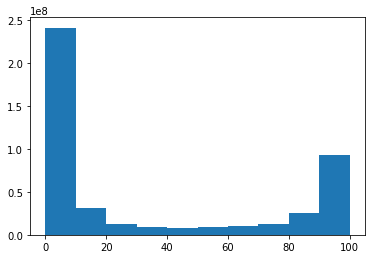

In [43]:
plt.hist(ad_bulk.X.flatten())
plt.show()

In [41]:
ad_bulk.write_h5ad(Path.joinpath(project_dir, "{}_coverage_0_binned_by_1_wmeta_only_percent.h5ad".format(project_id)))

In [12]:
ad.write_h5ad(Path.joinpath(project_dir, "{}_wmeta.h5ad".format(project_id)))

/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample Name' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Data Type' as categorical


# Human methylation data — GSE40279 (Hannum)

In [30]:
cwd = Path.cwd()
project_dir = Path.joinpath(cwd, Path('data/GSE40279/'))
project_id = 'GSE40279'
project_samples_dir = 'GSE40279_RAW'

metainfo_old_path = 'sample.csv'
metainfo_path = 'Hannum_Metainfo.csv'
gl_metainfo_old_path = Path.joinpath(project_dir, metainfo_old_path)
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)
data_path = Path.joinpath(cwd, project_dir, "{}.csv".format(project_id))
gl_project_dir = Path.joinpath(cwd, project_dir)

In [42]:
df_meta = pd.read_csv(gl_metainfo_old_path)
df_meta['Age'] = df_meta['Title'].apply(lambda x: float(x.split(' ')[1].replace('y', '')))
df_meta['ID'] = df_meta['Title'].apply(lambda x: "X{}".format(x.split(' ')[2]))
df_meta.set_index('ID', inplace=True)
df_meta.drop(["Title", "Supplementary Types", "Supplementary Links", "SRA Accession", "Contact", "Release Date", "Channels", "Taxonomy", "Platform", "Series", "Sample Type"], axis=1, inplace=True)
df_meta["Accession"] = df_meta["Accession"].astype("category")
df_meta["Age"] = df_meta["Age"].astype(np.float16)
df_meta.to_csv(gl_metainfo_path)
df_meta.head()

,Accession,Age
ID,,
X1001,GSM989827,67.0
X1002,GSM989828,89.0
X1003,GSM989829,66.0
X1004,GSM989830,64.0
X1005,GSM989831,62.0


In [44]:
df_full = pd.read_csv(Path.joinpath(project_dir, "GSE40279_average_beta.txt"), sep='\t', index_col=0)
print(df_full.shape)
df_full.head()

(473034, 656)


,X1001,X1002,X1003,X1004,X1005,X1006,X1007,X1008,X1009,X1010,...,X11085,X11086,X11087,X11089,X11090,X11092,X11093,X11094,X11095,X11096
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg13869341,0.849261,0.897434,0.751596,0.871313,0.775703,0.905383,0.809341,0.831056,0.785725,0.851040,...,0.872390,0.797936,0.813616,0.838759,0.845707,0.908023,0.800924,0.781394,0.844790,0.863501
cg14008030,0.505916,0.476842,0.487245,0.466692,0.490255,0.536831,0.513063,0.517671,0.526291,0.482147,...,0.609596,0.589514,0.550069,0.536344,0.573834,0.555264,0.578522,0.551470,0.570779,0.620469
cg12045430,0.072590,0.079020,0.089230,0.076666,0.079986,0.096142,0.084693,0.084978,0.076284,0.088784,...,0.074361,0.042380,0.047387,0.036802,0.025272,0.051956,0.063291,0.041310,0.059926,0.018954
cg20826792,0.186961,0.228201,0.237660,0.253624,0.220404,0.229790,0.221750,0.264803,0.198577,0.248889,...,0.187167,0.163056,0.187181,0.117650,0.122737,0.197111,0.223854,0.188288,0.129233,0.051887
cg00381604,0.036803,0.053161,0.045588,0.032824,0.035804,0.018335,0.046591,0.045572,0.049980,0.046218,...,0.011383,0.004570,0.014957,0.012622,0.015449,0.041821,0.038828,0.022204,0.013555,0.000000


In [45]:
ad = sc.AnnData(df_full)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)

In [46]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

# Mice embryos GSE34864

In [3]:
import pandas as pd
import os
import sys
import pwd
from pathlib import Path
from tqdm import tqdm, trange
from tqdm.contrib.concurrent import process_map
import meth.tools as mtools
import numpy as np

cwd = Path.cwd()
project_dir = Path('data/GSE34864')
project_id = 'GSE34864'
project_samples_dir = 'GSE34864_RAW'
path_samples = Path.joinpath(project_dir, project_samples_dir)
gl_path_samples = Path.joinpath(cwd, path_samples)
gl_project_dir = Path.joinpath(cwd, project_dir)
all_samples = os.listdir(gl_path_samples)

In [4]:
data_path = Path.joinpath(cwd, project_dir, "{}.csv".format(project_id))
print(data_path)

# df_coverage = mtools.get_methylation_df(data_path, typ='coverage')
df_percent = mtools.get_methylation_df(data_path, typ='percents')
print(df_percent.shape)
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/GSE34864/GSE34864.csv
(1533043, 76)


,GSM856541_ICM-BDF1-AJ-3a,GSM856503_zygote-BDF1-X1-3,GSM856551_E75-BDF1-BDF1-2,GSM856537_8cellNoPB2-BDF1-X1-2,GSM856495_oocytes-BDF1-1,GSM856516_2cellNoPB2-BDF1-X1-3,GSM856508_2cell-BDF1-BDF1-1,GSM856530_8cell-BDF1-BDF1-3,GSM856550_E75-BDF1-BDF1-1,GSM870007_sperm-X1-3,...,GSM856526_4cellNoPB2-BDF1-X1-2,GSM856502_zygote-BDF1-BDF1-2,GSM856507_zygoteNoPB-BDF1-X1-3,GSM856535_8cellNoPB-BDF1-X1-2,GSM856525_4cellNoPB2-BDF1-X1-1,GSM870002_zygoteNoPB2-BDF1-X1-5,GSM856509_2cell-BDF1-X1-2,GSM856515_2cellNoPB2-BDF1-X1-2,GSM856556_Brain-2,GSM856505_zygoteNoPB-BDF1-X1-1
index,,,,,,,,,,,,,,,,,,,,,
chr1_3010894,0.571429,0.260000,0.711111,NaN,NaN,NaN,NaN,0.562500,0.870968,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.827586,NaN
chr1_3010922,0.794872,NaN,NaN,NaN,NaN,NaN,NaN,0.818182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.917647,NaN
chr1_3089715,0.300000,0.370370,0.765957,0.340000,0.377778,0.527778,NaN,0.389831,0.846154,NaN,...,0.400000,NaN,0.426230,0.324324,NaN,0.409091,NaN,0.5625,0.936170,0.435897
chr1_3089865,0.227273,0.446154,0.580000,0.580645,0.563636,0.466667,NaN,0.333333,0.813953,0.823529,...,0.424242,NaN,0.509434,0.446809,NaN,0.409836,NaN,NaN,NaN,0.525000
chr1_3102314,0.548387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
metainfo_old_path = 'GSE34864_mousePMD100bpMe.txt'
metainfo_path = 'GSE34864_Metainfo.csv'
gl_metainfo_old_path = Path.joinpath(project_dir, metainfo_old_path)
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)
data_path = Path.joinpath(cwd, project_dir, "{}.csv".format(project_id))
gl_project_dir = Path.joinpath(cwd, project_dir)

In [12]:
stage2age = {'ICM': 5.0,
             'zygote': 0.5,
             'E75':7.5, '8cellNoPB2': 2.5, 'oocytes': 0.0, '2cellNoPB2': 1.5,
       '2cell': 1.5, '8cell': 2.5, 'sperm': 0.0, 'zygoteNoPB': 0.5, 'E65': 6.5, '8cellNoPB': 2.5,
       'sperm2': 0.0, '4cellNoPB': 2.0, '2cellNoPB': 1.5, 'zygoteNoPB2': 0.5, '4cell': 2.0,
       'Liver': 7*30., 'Heart': 7*30., 'Brain': 7*30., '4cellNoPB2': 2.0
}


In [22]:
# df_meta = pd.read_csv(data_path, skiprows=0, nrows=0, index_col=0, sep='\t')
df_meta = pd.DataFrame(df_percent.columns, columns=['FullID'])
df_meta['GSM'] = df_meta.iloc[:,0].apply(lambda x: x.split('_')[0])
df_meta['SampleID'] = df_meta.iloc[:,0].apply(lambda x: x.split('_')[1].split('-')[0])
df_meta['SampleInfo'] = df_meta.iloc[:,0].apply(lambda x: "-".join(x.split('_')[1].split('-')[1:]))
df_meta['Age'] = df_meta['SampleID'].apply(lambda x: stage2age[x])
df_meta.set_index('FullID', inplace=True)

to_category = ['GSM', 'SampleID', 'SampleInfo']
df_meta[to_category] = df_meta[to_category].astype("category")

df_meta.to_csv(gl_metainfo_path, sep='\t')
df_meta.head()

,GSM,SampleID,SampleInfo,Age
FullID,,,,
GSM856541_ICM-BDF1-AJ-3a,GSM856541,ICM,BDF1-AJ-3a,5.0
GSM856503_zygote-BDF1-X1-3,GSM856503,zygote,BDF1-X1-3,0.5
GSM856551_E75-BDF1-BDF1-2,GSM856551,E75,BDF1-BDF1-2,7.5
GSM856537_8cellNoPB2-BDF1-X1-2,GSM856537,8cellNoPB2,BDF1-X1-2,2.5
GSM856495_oocytes-BDF1-1,GSM856495,oocytes,BDF1-1,0.0


In [23]:
ad = sc.AnnData(df_percent)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)

In [24]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

# Bohan parabiosis liver

In [51]:
import pandas as pd
import os
import sys
import pwd
from pathlib import Path
from tqdm import tqdm, trange
from tqdm.contrib.concurrent import process_map
import meth.tools as mtools
import numpy as np

cwd = Path.cwd()
project_dir = Path('data/Parabiosis_liver/')
project_id = 'Parabiosis_liver'
project_samples_dir = 'Parabiosis_liver_RAW'
path_samples = Path.joinpath(project_dir, project_samples_dir)
gl_path_samples = Path.joinpath(cwd, path_samples)
gl_project_dir = Path.joinpath(cwd, project_dir)
all_samples = os.listdir(gl_path_samples)

In [52]:
data_path = Path.joinpath(cwd, project_dir, "{}_coverage_0_binned_by_10.csv".format(project_id))
print(data_path)
df_percent = mtools.get_methylation_df(data_path, typ='percents')
print(df_percent.shape)
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/Parabiosis_liver/Parabiosis_liver_coverage_0_binned_by_10.csv
(4178255, 46)


,BZ64,BZ25,BZ43,BZ81,BZ11,BZ42,BZ16,BZ41,BZ82,BZ66,...,BZ63,BZ47,BZ72,BZ55,BZ45,BZ75,BZ26,BZ34,BZ35,BZ44
index,,,,,,,,,,,,,,,,,,,,,
chr10_100012200,100.000000,100.0000,87.878788,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,...,100.000000,100.0,98.412698,96.666667,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
chr10_100012210,0.000000,0.0000,5.882353,0.000000,4.000000,4.166667,0.000000,7.894737,0.00,0.000000,...,10.000000,0.0,7.407407,7.142857,5.000000,0.000000,5.263158,0.000000,31.250000,11.627907
chr10_100012220,96.296296,98.4375,98.571429,100.000000,97.101449,98.666667,96.153846,95.312500,100.00,100.000000,...,96.470588,90.0,100.000000,93.333333,100.000000,100.000000,93.333333,97.222222,100.000000,97.701149
chr10_100012230,100.000000,90.6250,91.428571,93.181818,86.956522,100.000000,100.000000,95.312500,100.00,91.489362,...,85.882353,95.0,98.913043,100.000000,87.272727,91.891892,100.000000,100.000000,100.000000,94.252874
chr10_100012250,97.530864,95.3125,82.857143,93.181818,89.855072,96.000000,100.000000,92.187500,93.75,80.851064,...,89.411765,80.0,92.391304,95.555556,92.727273,100.000000,93.333333,63.888889,94.594595,88.505747


In [53]:
group_description = {'BZ1': "all young iso attached to the young", 
                     'BZ2': "young iso attached to the young with detachment", 
                     'BZ3': "old iso attached to the old",
                     'BZ4': "old iso attached to the old with detachment", 
                     'BZ5': "old het attached to the young", 
                     'BZ6': "old het attached to the young with detachment",
                     'BZ7': "young het attached to the old",
                     'BZ8': "young het attached to the old with detachment"}

metainfo_path = 'Liver_Parabiosis_Metainfo.csv'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)

In [54]:
df_meta = pd.DataFrame(df_percent.columns, columns=['SampleID'])
df_meta['Tissue'] = 'Liver'
df_meta['GroupID'] = df_meta['SampleID'].apply(lambda x: x[:3])
df_meta['MouseID'] = df_meta['SampleID'].apply(lambda x: x[3:])
df_meta['GroupDescription'] = df_meta['GroupID'].apply(lambda x: group_description[x])
df_meta.set_index('SampleID', inplace=True)
to_category = ['Tissue', 'GroupID', 'MouseID', "GroupDescription"]
df_meta[to_category] = df_meta[to_category].astype("category")
df_meta.to_csv(gl_metainfo_path, sep='\t')
df_meta.head()

,Tissue,GroupID,MouseID,GroupDescription
SampleID,,,,
BZ64,Liver,BZ6,4,old het attached to the young with detachment
BZ25,Liver,BZ2,5,young iso attached to the young with detachment
BZ43,Liver,BZ4,3,old iso attached to the old with detachment
BZ81,Liver,BZ8,1,young het attached to the old with detachment
BZ11,Liver,BZ1,1,all young iso attached to the young


In [55]:
df_meta = pd.read_csv(gl_metainfo_path, sep='\t', index_col=0)
df_meta.head()

,Tissue,GroupID,MouseID,GroupDescription
SampleID,,,,
BZ64,Liver,BZ6,4,old het attached to the young with detachment
BZ25,Liver,BZ2,5,young iso attached to the young with detachment
BZ43,Liver,BZ4,3,old iso attached to the old with detachment
BZ81,Liver,BZ8,1,young het attached to the old with detachment
BZ11,Liver,BZ1,1,all young iso attached to the young


In [56]:
ad = sc.AnnData(df_percent)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)

In [57]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Tissue' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'GroupID' as categorical
/Users/tarkhov/opt/anaconda3/envs/py310/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and w

# Bohan parabiosis blood

In [40]:
import pandas as pd
import os
import sys
import pwd
from pathlib import Path
from tqdm import tqdm, trange
from tqdm.contrib.concurrent import process_map
import meth.tools as mtools
import numpy as np

cwd = Path.cwd()
project_dir = Path('data/Parabiosis_blood/')
project_id = 'Parabiosis_blood'
project_samples_dir = 'Parabiosis_blood_RAW'
path_samples = Path.joinpath(project_dir, project_samples_dir)
gl_path_samples = Path.joinpath(cwd, path_samples)
gl_project_dir = Path.joinpath(cwd, project_dir)
all_samples = os.listdir(gl_path_samples)

In [42]:
data_path = Path.joinpath(cwd, project_dir, "{}_coverage_0_binned_by_10.csv".format(project_id))
print(data_path)
df_percent = mtools.get_methylation_df(data_path, typ='percents')
print(df_percent.shape)
df_percent.head()

/Users/tarkhov/Dropbox/Harvard/Science/Stochastic aging/data/Parabiosis_blood/Parabiosis_blood_coverage_0_binned_by_10.csv
(6394251, 32)


,BldBZ35,BldBZ14,BldBZ26,BldBZ55,BldBZ41,BldBZ34,BldBZ31,BldBZ15,BldBZ61,BldBZ43,...,BldBZ51,BldBZ45,BldBZ33,BldBZ12,BldBZ11,BldBZ32,BldBZ62,BldBZ44,BldBZ13,BldBZ52
index,,,,,,,,,,,,,,,,,,,,,
chr10_100012200,100.000000,95.454545,100.000000,90.625,100.000000,96.428571,100.000,100.000000,100.000000,100.000000,...,94.339623,100.000000,87.878788,100.000000,95.454545,97.297297,100.000000,85.937500,100.000000,100.000000
chr10_100012210,0.000000,12.500000,7.142857,0.000,15.625000,0.000000,0.000,13.333333,0.000000,0.000000,...,10.256410,7.692308,10.526316,18.750000,3.703704,2.857143,0.000000,14.705882,5.000000,0.000000
chr10_100012220,100.000000,97.826087,94.382022,97.500,96.296296,96.078431,96.875,100.000000,94.117647,90.476190,...,100.000000,98.913043,100.000000,100.000000,97.183099,100.000000,95.000000,99.000000,100.000000,100.000000
chr10_100012230,100.000000,100.000000,97.752809,100.000,100.000000,98.039216,100.000,98.717949,98.529412,92.063492,...,100.000000,100.000000,100.000000,100.000000,98.591549,100.000000,95.000000,97.000000,94.594595,98.684211
chr10_100012250,97.222222,100.000000,96.629213,97.500,83.333333,90.196078,90.625,98.717949,95.588235,84.126984,...,95.238095,95.652174,75.000000,96.078431,95.774648,95.833333,86.666667,93.000000,98.648649,92.105263


In [43]:
group_description = {'BZ1': "all young iso attached to the young", 
                     'BZ2': "young iso attached to the young with detachment", 
                     'BZ3': "old iso attached to the old",
                     'BZ4': "old iso attached to the old with detachment", 
                     'BZ5': "old het attached to the young", 
                     'BZ6': "old het attached to the young with detachment",
                     'BZ7': "young het attached to the old",
                     'BZ8': "young het attached to the old with detachment"}

metainfo_path = 'Blood_Parabiosis_Metainfo.csv'
gl_metainfo_path = Path.joinpath(project_dir, metainfo_path)

In [48]:
df_meta = pd.DataFrame(df_percent.columns, columns=['SampleID'])
df_meta['Tissue'] = 'Blood'
df_meta['GroupID'] = df_meta['SampleID'].apply(lambda x: x[3:6])
df_meta['MouseID'] = df_meta['SampleID'].apply(lambda x: x[6:])
df_meta['GroupDescription'] = df_meta['GroupID'].apply(lambda x: group_description[x])
df_meta.set_index('SampleID', inplace=True)
to_category = ['Tissue', 'GroupID', 'MouseID', "GroupDescription"]
df_meta[to_category] = df_meta[to_category].astype("category")

df_meta.to_csv(gl_metainfo_path, sep='\t')
df_meta.head()

,Tissue,GroupID,MouseID,GroupDescription
SampleID,,,,
BldBZ35,Blood,BZ3,5,old iso attached to the old
BldBZ14,Blood,BZ1,4,all young iso attached to the young
BldBZ26,Blood,BZ2,6,young iso attached to the young with detachment
BldBZ55,Blood,BZ5,5,old het attached to the young
BldBZ41,Blood,BZ4,1,old iso attached to the old with detachment


In [49]:
ad = sc.AnnData(df_percent)
ad.var = pd.concat((ad.var, df_meta.loc[ad.var.index,:]), axis=1)
ad.X = ad.X.astype(np.float16)

In [50]:
ad.write_h5ad(Path.joinpath(project_dir, "{}.h5ad".format(project_id)))

# Analysing the data
The idea is to extract those sites that are decreasing or increasing their methylation level (exactly from 0 to 1), and estimate the average rate of that. It must be the same in all species (the relative one!). That would mean that the temperature is the limiting factor, whereas the methylation clocks are just measuring the effects of stochastic environmental factors on the organism. The moment the methylation reaches 0.5 means that the organism is dead. Hence, stochasticity is the sole reason limiting the lifespan.